# Assignment objective

We have data from Raleigh, NC, where we recently deployed a flyer program in order to increase public awareness of the possibility of taking a Pagaya loan. You objective is to assess the potency of the flyer program in terms of activation by analyzing production and TU data obtained from the town.


# Basic imports 

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data preparation

## Data from TU 

To begin with, upload TUs credit information from the relevant quarter (which is 2018Q3). This data is available in our `s3` path under the name `tu_gen_data2018Q3.parquet`. To get to our `s3` path import `DATA_FILES_PATH` from `pagayapro.paths.data_paths`

In [170]:
from pagayapro.paths.data_paths import DATA_FILES_PATH

read the parquet file from `s3`. Only read the columns ["sequence_num", "credit_score", "listing_term", "int_rate", "loan_amnt", "monthly_pmt", "original_state"]

In [171]:
tu_data= pd.read_parquet(
    os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"),
                columns = ["sequence_num", "credit_score", 
                           "listing_term", "int_rate" ,
                           "loan_amnt", "monthly_pmt", 
                           "original_state"])

In [172]:
tu_data['quan_credit'] = pd.qcut(tu_data['credit_score'], 10, labels=False)

In [173]:
tu_data['quan_loan_amnt'] = 11
for i in range(10):
    tu_data.loc[tu_data['quan_credit'] == i, 'quan_loan_amnt'] = (pd
                                                                  .qcut(tu_data
                                                                        .loc[tu_data.groupby('quan_credit')
                                                                             .groups[i], 
                                                                             'loan_amnt'], 
                                                                        10, 
                                                                        labels=False)
                                                                  .astype(int)
                                                                 )
tu_data

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,quan_credit,quan_loan_amnt
id,,,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI,9,2
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM,9,7
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD,2,1
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC,1,8
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN,1,6
...,...,...,...,...,...,...,...,...,...
1011850581661f8b9b43f009852877e85ebc30aa0a6c86d8603ecf8646d9f31d,1d572821ea818a0a3bb48a521335114caf2673fdd7522d...,751,36.0,10.91,20000.0,654.0,NC,8,7
bd0b26d176d0a9c2039723f02048a7989e85586374ab8d9a2b5b0529c2899f13,9dbf406d2d7eaf114ce61f742fb0954fd6e27e137b8203...,731,60.0,11.84,6000.0,133.0,NC,7,2
3503894d630dc781ebd68989e8ce8f53c7a7a842c56c2a0f51086ddc0d11ba32,8f3b75fab1a678c70823319a5fc580cc8e5309c30af5d8...,644,60.0,35.81,8358.0,301.0,NC,2,5


Output the first 5 rows of tu_data

In [174]:
tu_data.head()

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,quan_credit,quan_loan_amnt
id,,,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI,9,2
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM,9,7
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD,2,1
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC,1,8
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN,1,6


## Activation data 

Your data regarding activation arrives as forms, detailing the loan amount, interest rate offered to the client and whether he or she accepted the offer. These are available on the assignment's `s3` path, which you can import from `pagayapro.path.data_paths` under the name `ASSIGNMENT1_DATA`, in the subdirectory `offers`. 

In [175]:
from pagayapro.paths.data_paths import ASSIGNMENT1_DATA
import glob

Read all files in the subdirectory `offers` of `ASSIGNMENT1_DATA` whose name contains the substring `raleigh`.

In [176]:
raleigh_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*raleigh*")
    )
)

how many forms are there?


In [177]:
len(raleigh_forms)

769

Read all the form files and create a table which contains only the last offer given to each borrower. Call this dataframe `raleigh_df`.

In [178]:
raleigh_df= pd.read_csv(raleigh_forms[0])

for num in range(1,len(raleigh_forms)):
    raleigh_df = pd.concat([raleigh_df, pd.read_csv(raleigh_forms[num])], ignore_index=True)

raleigh_df = raleigh_df.sort_values('offer_date', ascending=False).drop_duplicates('id').reset_index(drop=True)

How many rows are there in your table? How many distict ids?

In [179]:
len(raleigh_df)

8792

In [180]:
len(raleigh_df['id'].value_counts())

8792

How can you explain the duplicate ids? Sample 5 ids with multiple lines and display them.

#### There are none, but technically, duplicate ids might come up for borrowers which didn't accept the initial offer, but got a second loan offer (or more than 2).

#### If there were duplicates, this is how we would have shown 5 of them:

```python
dupl_list = raleigh_df.groupby('id').size().sort_values(ascending=False).head()
raleigh_df.loc[raleigh_df['id'].isin(dupl_list.index)].sort_values(by='id')
```

Drop all lines in the dataframe which contain irrelevant information.

#### Done

What is the average interest rate offered to clients? What is the average among clients who accepted the offer?

In [181]:
raleigh_df['offered_interest_rate'].mean()

15.524284576888082

In [182]:
raleigh_df.loc[raleigh_df['offer_accepted'] == True]['offered_interest_rate'].mean()

15.307480314960632

What is the percentage of activation in this dataframe?

In [183]:
raleigh_df['offer_accepted'].value_counts(normalize=True)[1]

0.08666969972702457

Enrich your dataframe with additioanl TU features by merging it with the `tu_data` df. Note that the two dataframe share the `id` and `sequence_num` features.

In [184]:
raleigh_df = raleigh_df.merge(tu_data, left_on=['id', 'sequence_num'], right_on=['id', 'sequence_num'])
raleigh_df

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,quan_credit,quan_loan_amnt
0,be462838a489d80c3dfa088cda7d04d650f5afc9fac0fa...,da4c2882d9002a68ae96962a6a9f0d18fd2df86f7e71e0...,8000.0,10.22,False,2020-12-10,764,36.0,10.22,8000.0,259.0,NC,8,3
1,cefa90420bde7d95ce54ad83fbb17f8841a7390c505bea...,85a6a68c1fdd0081220bf891a51af4209bbfe285af161b...,4075.0,30.89,False,2020-12-10,555,36.0,30.89,4075.0,175.0,NC,0,3
2,69b282258fdc0b55336a5c88e94dd0c0a4fdac7a6a448b...,8b1ed3ba66907feb4c208578846eddf03fc09c8a605048...,15000.0,15.27,False,2020-12-10,638,60.0,15.27,15000.0,359.0,NC,2,7
3,1cd63a26af1b927957c7743ba557f1895a90ec3b891cfc...,28851f4c2e331d785f0f37ae78cf6a574dd8076375dbe0...,5000.0,11.55,True,2020-12-10,721,36.0,11.55,5000.0,165.0,NC,6,1
4,e96d59f7aa7e2d6ad5ebccba21085a772d1bb8a0321d2f...,466be4dfe5d6734fdc2fe9d95b91507e3269f86771c5e4...,20000.0,11.41,True,2020-12-10,751,60.0,11.41,20000.0,439.0,NC,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,3a72ae7a82244f811b37c48f57469b708207004f011163...,06c005c5de6ba445d4c709b84611ac2b8542cd5d37221b...,3800.0,12.97,False,2018-01-01,661,36.0,12.97,3800.0,128.0,NC,3,1
8788,9b785f1c83a022947857aa109de2aeb3c2c54231b910ed...,4f94dbec44bd09b1c47b08f17a62a7b58b17fc108b077f...,7000.0,17.98,False,2018-01-01,662,36.0,17.98,7000.0,253.0,NC,3,3
8789,05ea7b0c00de4b3d61378c31572b5b4f10cbb73da1d3d3...,47b11693150bd44d0041819037cce51b49869d75be9e41...,6000.0,14.76,True,2018-01-01,683,60.0,14.76,6000.0,142.0,NC,4,2
8790,e3e32f85cd78bb5002ccdc037c1818029f716e7a47911e...,3dcd131256c103fccb61c75cd79ca97fa2b5e31c4ab03e...,6899.0,12.56,False,2018-01-01,735,36.0,12.56,6899.0,231.0,NC,7,2


What is the average credit score of the clients? What is the average among clients who accepted the offer?

In [185]:
raleigh_df['credit_score'].mean()

689.821542311192

In [186]:
raleigh_df.loc[raleigh_df['offer_accepted'] == True]['credit_score'].mean()

702.5446194225722

# Validations

Before we embark on a statistical test, let's do some validations to make sure that the Raleig sample is not somehow distinct from the general population. Our random sample from the general population is the TU data.

Create a histogram to describe the distribution of requested loan amounts in Raleigh and in the general population. Do the distributions look similar? (A good rule-of-thumb for the number of bins to use is the square-root of the number of unique value.)

#### we checked that the loan_amnt column and the requested_amount one are identical.

#### We chose to use the loan_vals for both plots, so we can compare the distributions (We also chose the same range of X values for the same reason).

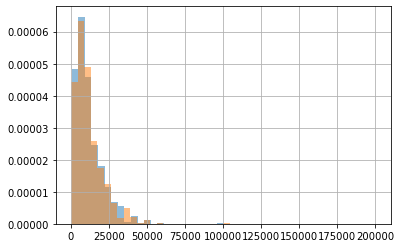

In [268]:
loan_vals = len(raleigh_df['loan_amnt'].value_counts())
loan_vals_tu = len(tu_data['loan_amnt'].value_counts())

raleigh_df['loan_amnt'].hist(bins=int(loan_vals**0.5), alpha=0.5, density=True);
tu_data['loan_amnt'].hist(bins=int(loan_vals**0.5), range=(0,200_000), alpha=0.5, density=True);

Describe the loan amount distribution using `sns.distplot` in the Raleigh dataframe and in TU.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

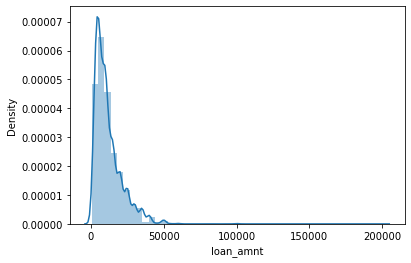

In [188]:
sns.distplot(raleigh_df['loan_amnt'], bins=int(loan_vals**0.5));

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

(-10000, 200000)

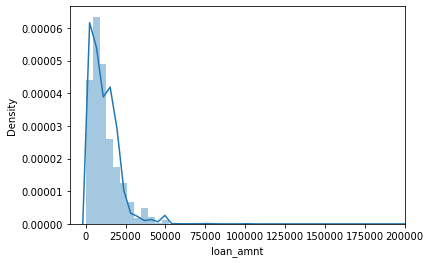

In [189]:
ax = sns.distplot(tu_data['loan_amnt'], bins=int(loan_vals**0.5), hist_kws={'range':(0,200_000)})
ax.set_xlim(-10000, 200000)

We also want to verify that the offered interest rate in Raleigh seem similar to those in the general population. 
Create a histogram to describe the distribution of offered interest rates in Raleigh and interest rates in the general population. Do the distributions look similar?

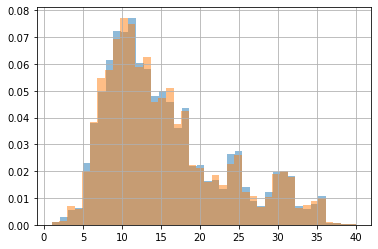

In [190]:
raleigh_df['int_rate'].hist(density=True, alpha=0.5, bins=int(40));
tu_data['int_rate'].hist(density=True, alpha=0.5, bins=int(40));

Describe the interest rate distribution using `sns.distplot` in the Raleigh dataframe and in TU.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

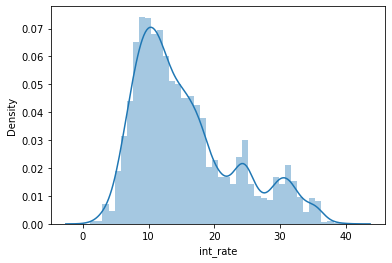

In [191]:
sns.distplot(raleigh_df['int_rate']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

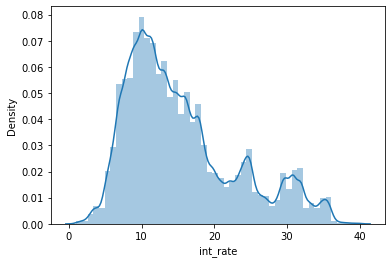

In [192]:
sns.distplot(tu_data['int_rate']);

Additionally, we want to make sure the credit scores are not visibly different in Raleigh from the general population, as this might mean that the data we obtained from the town might not be representative of the general popuation.

Create a histogram to describe the distribution of credit scores in the Raleigh sample and in the general population. Do the distributions look similar? How many bins did you use?

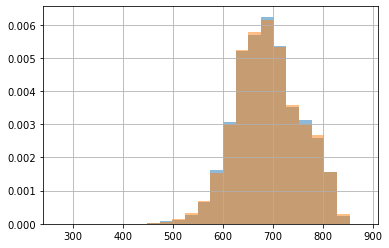

In [193]:
raleigh_df['credit_score'].hist(range=(270,880), alpha=0.5, density=True, bins=int(600**0.5));
tu_data['credit_score'].hist(range=(270,880), alpha=0.5, density=True, bins=int(600**0.5));

Describe the credit score distribution using `sns.distplot`  in the Raleigh dataframe and in TU.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

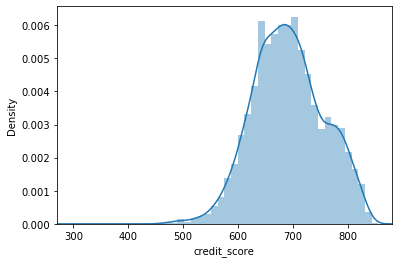

In [194]:
ax = sns.distplot(raleigh_df['credit_score'], hist_kws={'range':(270,880)})
ax.set_xlim(270,880);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

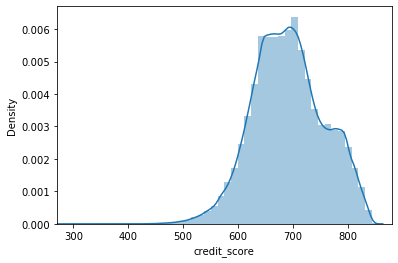

In [195]:
ax = sns.distplot(tu_data['credit_score'], hist_kws={'range':(270,880)})
ax.set_xlim(270,880);

Finally, check whether the loans in both datasets have similar distributions of term (i.e. the amount of months the borrower takes the loan for). What values of term exist in the data?

#### Only 36 or 60 month loans

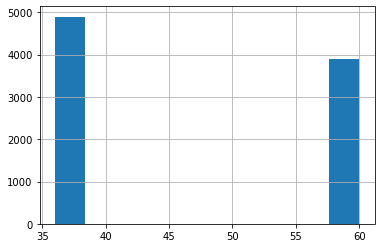

In [196]:
raleigh_df['listing_term'].hist();

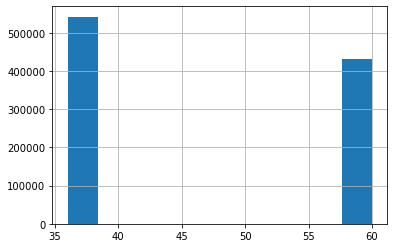

In [197]:
tu_data['listing_term'].hist();

# CLT in action

One more thing before we start the test. Our goal is to check whether, for which we'll run some statistical test (you probably already know which) which checks if something belongs to a noraml distribution with some mean and some variance. But... is activation normally distributed in the Raliegh sample? 

#+2 points if you answer without plotting

#### The activation rate is either true or false (1 or 0). Therefore the activation rate in Raleigh is distributed binomially.
#### However, due to CLT, when we look at averages of random samples, and take enough of these averages, Raleighs activation rate distribution, seems to fit a normal distribution very well.

The reason why we can assume normality is because we're checking averages of samples and we're relying on the Central Limit Theorem. We won't prove the theorem, but let's test it for a bit. 

Write a function which takes a pandas series S and a natural number n and creates a series of means of samples (with replacement) of n entries from S. Decide for yourself on the length of the output series. You can also use a different data structure if you find it more suitable as the output.

In [198]:
def random_sample_mean(s: np.ndarray, n: int):
    return s[np.random.randint(low=0, high=len(s)-1, size=n)].mean()

def bootstrap_samples(s: pd.Series, n: int):
    ret_size = int(len(s)**0.5)
    
    temp = np.ndarray(shape=(ret_size, len(s)))
    temp[np.arange(ret_size)] = s.values
    
    return pd.Series(np.apply_along_axis(random_sample_mean, axis=1, arr=temp, n=n))

Optionally- also create a function which, given the same input as above, plots a histogram of the series of means, and also indicates the mean of this series.

499603.27311476803

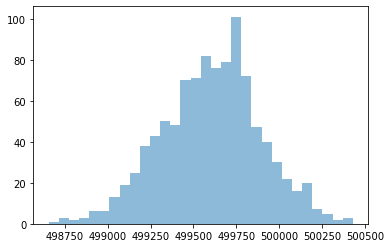

In [199]:
def hist_boot(s, n):
    tmp = bootstrap_samples(s, n)
    plt.hist(tmp, bins=30, alpha=0.5)
    return tmp.mean()

hist_boot(pd.Series(np.random.randint(low=0, high=1000000-1, size=1000000)), 1000000)

Generate plots of the series of means of activation in Raleigh and in TU for n = 1, 2, 5, 10, 100, 1000 and 1e6, and indicate their means. Does the distribution approach a normal distribution as $n\to\infty$ in your opinion?

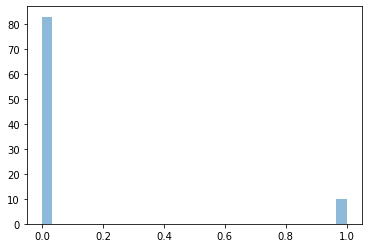

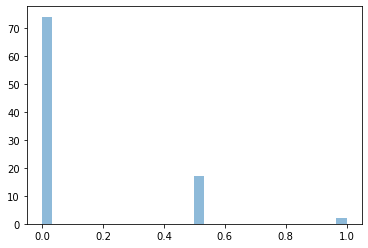

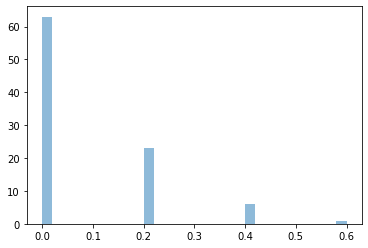

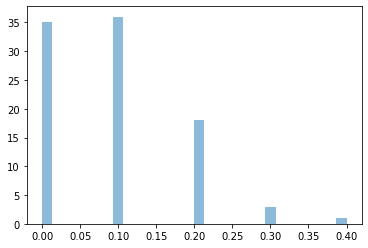

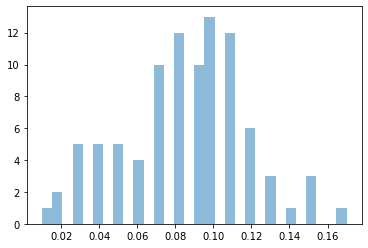

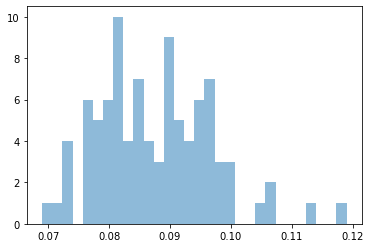

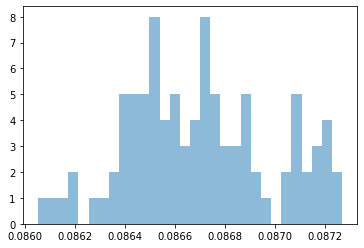

In [200]:
run_list = [1,2,5,10,100,1000,1000000]

for num in run_list:
    hist_boot(raleigh_df['offer_accepted'], num)
    plt.show()

Now that your fuction is ready, it's time to make it part of our infrastucture:
* Inside the `pagayapro` repo, create a branch called `feature/{your_user_name}/clt_tester/`.
* Create a file called `clt.py` inside `~/pagayapro/users/{user_name}/assignment1/` 
* Copy the two finctions you just created into the file.
* Push your file to `main`, open a PR and ask your mentor to review it. Once approved, rebase and merge.

# Statistical test 

As mentioned in the Notion doc, the activation in Raleigh before deployment was measured at 6.85%. In this section, you will run a test to check whether the activation in Raleigh is indeed different following the flyer program. 

In [201]:
!pip3 install statsmodels
from statsmodels.stats.proportion import proportions_ztest


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


Run a statistical test to check whether the current activation rate in Raleigh is different from 6,85%:
1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error? What is the power of your test?
3. Is the sample mean significantly different from the past value of 6.85?
4. Interpret your results. Can you declare the program as successful in increasing activation (what is the probability of wrongfully declaring it successful)?
5. Are there any other possible explanations for the change in activation that you observed? Discuss the possible drawbacks of our current test.

Use `proportions_ztestz` from `statsmodels.stats.proportion` in order to perform the test. Are your results significant?

1. Our hypotheses are:
H0 - The activation rate is still 6.85%.
H1 - The activation rate is different than 6.85%.
2. The probability of a type 1 error is 5% (same as alpha).
3.The sample mean - 9.09% significantly different from the past value of 6.85. This translates to p_value=2.88e-13 which is much smaller than required alpha(=5%)
4.We can declare that the activation rate increased. With that being said, there could confounding variables that can explain the increase - we need further testing. The probability of us being wrong in the difference significance, is again, the probability to make a type 1 error, which is 5%.
5.There could be many alternative possible explanation for activation rate increase, that are not related to the flyer program. For instance, global issues in economy and trends, pandemic, also local events in Raleigh itself that we are not aware of. These issues might affect the way people make decisions, and specifically the decision to take or reject a loan, thus affecting loan activation rates. In this case, the program is not the main reason for the increase in activation rate.

In [202]:
true_nums = len(raleigh_df.loc[raleigh_df['offer_accepted'] == True])
all_len = len(raleigh_df)
stat, pval = proportions_ztest(true_nums, all_len, 0.0685)
pval

1.4005491742963572e-09

Do you see any possible problems in your methodology? What other factors can explain the change in activation, if such a change exists?

We've answered in the above explanation.

# A/b test

In order to isolate temporal and environmental effects on activation, we'll run an a/b test, comparing the activation rate in Raleigh to that of Lubbock, TX, another town in which Pagaya operates without a flyer program. 

The activation forms for Lubbock also appear in the `offers` subdirectory of the `ASSIGNMENT1_DATA` folder. Read all files from this folder whose name contains the substring 'lubbock', and create a dataframe of final offers called `lubbock_df`, drop unnecessary rows from it, and enrich it with TU features.

In [203]:
lubbock_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*lubbock*")
    )
)
lubbock_df= pd.read_csv(lubbock_forms[0])
lubbock_df['file_num'] = 0
for num in range(1,len(lubbock_forms)):
    lubbock_df = pd.concat([lubbock_df, pd.read_csv(lubbock_forms[num])], ignore_index=True)
lubbock_df = lubbock_df.sort_values('offer_date', ascending=False).drop_duplicates('id').reset_index(drop=True)
lubbock_df = lubbock_df.merge(tu_data, left_on=['id', 'sequence_num'], right_on=['id', 'sequence_num'])
lubbock_df

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,file_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,quan_credit,quan_loan_amnt
0,3742bc381ddc6989be5463830f879557a13471e1b8618e...,b1276d6387f519d03d3cce044daaeeb45b568e49acf0a2...,2000.0,14.66,False,2020-12-10,NaN,795,36.0,14.66,2000.0,69.0,TX,9,0
1,b463a3bb87d8567327a3c84ecaee275b6a74ee244771d9...,35a33e4015f86ec0f66f4af0e1260654be78621befbc7d...,13843.0,15.09,True,2020-12-10,NaN,688,60.0,15.09,13843.0,330.0,TX,4,6
2,f06539526b5a630e09be216a6bccf9c2e56e0637a005ae...,8c90e11b90d6e158b0fa77816dfc370a71a6637eff749d...,10000.0,16.34,False,2020-12-10,NaN,696,60.0,16.34,10000.0,245.0,TX,5,4
3,d1607acf30687e938755525e87dc1b4a9597821a4f4eec...,03beebcc3cac134f1788d898d8bb7e8496c3d16982049b...,15000.0,18.50,False,2020-12-10,NaN,631,60.0,18.50,15000.0,385.0,TX,1,8
4,a66e1960316b31bb57e6d473ae372115b0399961fcf062...,6e61c47f603d22a38ed0fa63c83cef294d825c3fee9b58...,15000.0,8.99,False,2020-12-10,NaN,764,36.0,8.99,15000.0,477.0,TX,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315,13b8b97c37fc10f4ffb6801f95cc56c2abe64c702ecc7b...,05ff0b4b1c0454f00132c4b29feb87c91fe98f85ebbcf3...,10000.0,11.71,False,2018-01-01,0.0,758,60.0,11.71,10000.0,221.0,TX,8,3
11316,ed81efb2125c12ae73c92b36dad9f050c33f3ba3d98b42...,3aad64fa40af5bce4d473f7a38a360de1a2b6dc2b0284d...,9149.0,10.13,False,2018-01-01,0.0,529,60.0,10.13,9149.0,195.0,TX,0,7
11317,c751b91bf7b5c2655d7ea397e5a03cbccb74513ff527e4...,f8b6f3cb44cfbb44ad3fa12e6758566a38ef13bbd822bd...,5000.0,18.09,True,2018-01-01,0.0,643,36.0,18.09,5000.0,181.0,TX,2,2
11318,38d1be6da80ad94e7a2d226dbe070696c985613dd00f26...,e9d0ce908c56985675d71e793c06b5b6536afd3ba03d86...,16000.0,10.00,False,2018-01-01,0.0,692,60.0,10.00,16000.0,340.0,TX,5,7


What is the average interest rate in Lubbock? What is it among accepting borrowers?

In [204]:
lubbock_df['offered_interest_rate'].mean()

15.505397526501767

In [205]:
lubbock_df.loc[lubbock_df['offer_accepted'] == True]['offered_interest_rate'].mean()

13.553895131086142

What is the average credit score in Lubbock? What is it among accepting borrowers?

In [206]:
lubbock_df['credit_score'].mean()

690.0338339222615

In [207]:
lubbock_df.loc[lubbock_df['offer_accepted'] == True]['credit_score'].mean()

730.5337078651686

What is the rate of activation in Lubbock?

In [208]:
lubbock_df['offer_accepted'].value_counts(normalize=True)[1]

0.04717314487632509

## Caution about a/b test 

Note that this is not a classical a/b test. Usually, in such a test, one creates two random subgroups from the general population and applies a manipulation to one of them in order to see if the manipulation had an effect. However, in this case, it is very complicated to isolate a random subgroup from any population and deploy the flyer program only on it.
Thus, due to production limitation, we have to make do with what we got.

In order to justify the use of an a/b test for this situation, we should at least verify that the borrower population in Lubbock and Raleigh seem as though they were randomly selected from the general population. We have actually already checked it for Raleigh above. Add TU features to the loan amount, interest rate, credit score and term comparisons and see if there any major differences between the three populations (Lubbock, Raleigh and TU).

Text(0.5, 0, 'credit_score')

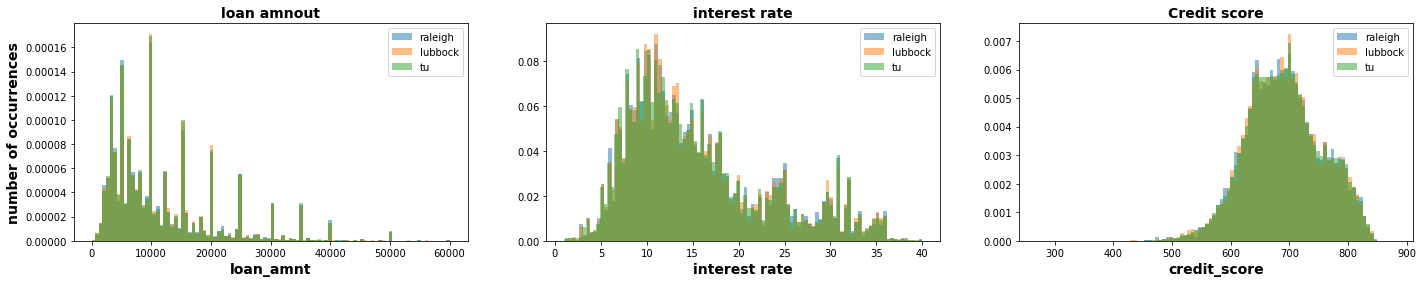

In [260]:
# sns.set(rc={“figsize”: (18, 6)});
plt.figure(figsize=(24,4))

plt.subplot(1,3,1)
bins = 100
plt.hist(raleigh_df['loan_amnt'], bins, alpha=0.5, label='raleigh', density=True, range=(0,60000))
plt.hist(lubbock_df['loan_amnt'], bins, alpha=0.5, label='lubbock', density=True, range=(0,60000))
plt.hist(tu_data['loan_amnt'], bins, alpha=0.5, label='tu', density=True, range=(0,60000))
plt.legend(loc='upper right')

plt.title('loan amnout', weight='bold', fontsize = 14)
plt.xlabel('loan_amnt',weight='bold', fontsize = 14)
plt.ylabel('number of occurrences',weight='bold', fontsize = 14)

plt.subplot(1,3,2)
plt.hist(raleigh_df['int_rate'], bins, alpha=0.5, label='raleigh', density=True)
plt.hist(lubbock_df['int_rate'], bins, alpha=0.5, label='lubbock', density=True)
plt.hist(tu_data['int_rate'], bins, alpha=0.5, label='tu', density=True)
plt.title('interest rate', weight='bold', fontsize = 14)
plt.legend(loc='upper right')
plt.xlabel('interest rate',weight='bold', fontsize = 14)

plt.subplot(1,3,3)
plt.hist(raleigh_df['credit_score'], bins, alpha=0.5, label='raleigh', density=True, range=(270, 880))
plt.hist(lubbock_df['credit_score'], bins, alpha=0.5, label='lubbock', density=True, range=(270, 880))
plt.hist(tu_data['credit_score'], bins, alpha=0.5, label='tu', density=True, range=(270, 880))
plt.title('Credit score', weight='bold', fontsize = 14)
plt.legend(loc='upper right')
plt.xlabel('credit_score', fontsize = 14,weight='bold')

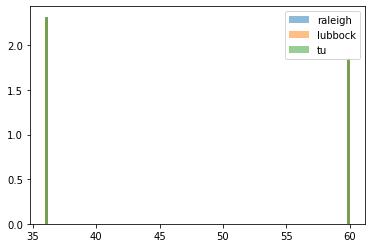

In [212]:
bins = 100
plt.hist(raleigh_df['listing_term'], bins, alpha=0.5, label='raleigh', density=True)
plt.hist(lubbock_df['listing_term'], bins, alpha=0.5, label='lubbock', density=True)
plt.hist(tu_data['listing_term'], bins, alpha=0.5, label='tu', density=True)
plt.legend(loc='upper right')
plt.show()

## Performing the test

Use the function you created in the file `clt.py` to plot the series of means of activation in Raleigh and Lubbock for samples of size n= 1, 10, 1000 and 1e6, and compare the means of the two histograms. To they seem to converge to the same value?

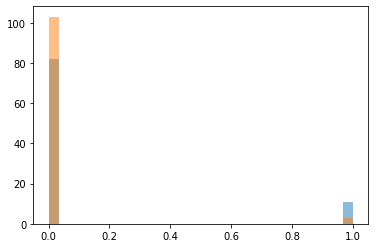

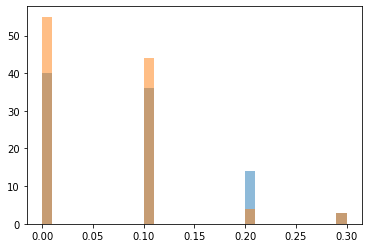

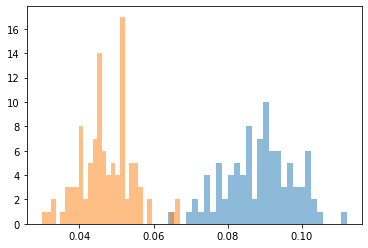

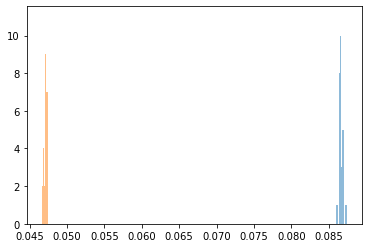

In [213]:
run_list = [1,10,1000,1000000]

for num in run_list:
    hist_boot(raleigh_df['offer_accepted'], num)
    hist_boot(lubbock_df['offer_accepted'], num)
    plt.show()

Apply a statistical test to see whether the activation rate in Raleigh, NC is significantly larger than Lubbock, TX. Clearly state and validate your test's assumption. 

1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error?
3. Are the two samples significantly different? 
4. Interpret your results. Can you declare the program as successful in increasing activation? What is the probability of wrongfully declaring it successful?

1.H0 - The activation rate of both cities is the same. H1 - The rate is different between the two cities.

2.The probability of a type 1 error is 5% (same as alpha).

3.The two samples are significantly different, the test returned p_value=1.1e-29 which is much smaller than required alpha(=5%).

4.The a/b test results, supports our notion that the flyer program was affective.

    - In the initial test, we got a significant increase in activation rate
    - In an a/b test, any global confounding variables that affected the increase, would have affected both cities. since there is no significant increase in activation rate in Bullock, we can assume there were no global confounding variables.
    - This does not indicate, that there aren't confounding variables that affect Raleigh locally
    - In addition, even though the cities have similar characteristics, we don't know what was the activation rate in Lubbock prior to the flyer program (that was deployed in Raleigh). It is possible that the activation rate of Lubbock was lower than 4.7% (activation rate in Lubbock after the flyer program was deployed in Raleigh) to begin with, which would undermine the efficiency of the flyer program

In [214]:
true_nums = len(raleigh_df.loc[raleigh_df['offer_accepted'] == True])
all_len = len(raleigh_df)

true_nums2 = len(lubbock_df.loc[lubbock_df['offer_accepted'] == True])
all_len2 = len(lubbock_df)

counts = [true_nums, true_nums2]
nobs = [all_len, all_len2]

stat, pval = proportions_ztest(counts, nobs)
print(pval)

1.0951717760291721e-29


Use the `proportions_ztestz` function from `statsmodels.stats.proportion` to perform a comparison between the activation probability in Lubbock and in Raleigh. 

Interprest your results; do you observe a significant change in activation in Raleigh? What is the probability of wrongfully declaring the program successful?

# Testing for activation in sub-populations

Now that you applied the a/b test to the Lubbock and Raleigh datasets, it is now required that you make a similar comparison on different subsets of the data within various credit score and loan amount bins. To do so, let us first decide on how to segment our data.

You are asked to divide your data into 10 bins according to loan amount, and then divide each of those bins into 10 bins according to loan amount. The most staightforward way of doing this is by using the `pd.qcut` function; first dividing the data into 10 quantiles of credit score and then dividing each of these quantiles into 10 according to loan amount.

Divide your datasets as above and add two columns to your data which indicate the (credit_score, loan_amnt) of the bin.

#### We did this at the top of the notebook.

Run an a/b test on each of the bins in your data and create a $10\times 10$ table containing the $p$ value of each test.

In [215]:
raleigh_df
p_vals_table_r = (raleigh_df
                .groupby(['quan_credit', 'quan_loan_amnt'])['offer_accepted']
                .agg(['sum', 'count'])
               )
p_vals_table_r

sum  count
quan_credit quan_loan_amnt            
0           0                14    112
            1                12     86
            2                 8     79
            3                 3     78
            4                 8     95
...                         ...    ...
9           5                21    115
            6                 8     35
            7                 9     83
            8                20    109
            9                16     69

[100 rows x 2 columns]

In [216]:
lubbock_df
p_vals_table_l = (lubbock_df
                .groupby(['quan_credit', 'quan_loan_amnt'])['offer_accepted']
                .agg(['sum', 'count'])
               )
p_vals_table_l

sum  count
quan_credit quan_loan_amnt            
0           0                 2    141
            1                 2    104
            2                 1    114
            3                 1    108
            4                 4    106
...                         ...    ...
9           5                28    176
            6                 4     45
            7                13    105
            8                12    130
            9                13     91

[100 rows x 2 columns]

In [217]:
# p_vals_table_l.index = p_vals_table_l.index.to_flat_index()

In [218]:
# p_vals_table_r.index = p_vals_table_r.index.to_flat_index()

In [219]:
p_vals_table = p_vals_table_l.copy()
p_vals_table = p_vals_table.merge(p_vals_table_r, how='inner', left_index=True, right_index=True)
p_vals_table

sum_x  count_x  sum_y  count_y
quan_credit quan_loan_amnt                                
0           0                   2      141     14      112
            1                   2      104     12       86
            2                   1      114      8       79
            3                   1      108      3       78
            4                   4      106      8       95
...                           ...      ...    ...      ...
9           5                  28      176     21      115
            6                   4       45      8       35
            7                  13      105      9       83
            8                  12      130     20      109
            9                  13       91     16       69

[100 rows x 4 columns]

In [220]:
p_vals_table = p_vals_table.apply(lambda x: (proportions_ztest([x['sum_x'], x['sum_y']], [x['count_x'], x['count_y']])[1]), axis=1)
p_vals_table

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


quan_credit  quan_loan_amnt
0            0                 0.000322
             1                 0.001581
             2                 0.002730
             3                 0.175490
             4                 0.165022
                                 ...   
9            5                 0.600185
             6                 0.082611
             7                 0.744670
             8                 0.039240
             9                 0.147689
Length: 100, dtype: float64

In [221]:
p_vals_table.index = pd.MultiIndex.from_tuples(p_vals_table.index, names=('quan_credit', 'quan_loan_amnt'))

In [222]:
p_vals_table = pd.DataFrame(data=p_vals_table.values, index=p_vals_table.index, columns=['p_value'])

In [223]:
p_vals_table

p_value
quan_credit quan_loan_amnt          
0           0               0.000322
            1               0.001581
            2               0.002730
            3               0.175490
            4               0.165022
...                              ...
9           5               0.600185
            6               0.082611
            7               0.744670
            8               0.039240
            9               0.147689

[100 rows x 1 columns]

Use the [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to represent your table as a heatmap. You can also use it on a suitable table of boolean values to get a more robus representation of which experiments turned out significant.

In [224]:
boolean_vals = p_vals_table[['p_value']].copy()
boolean_vals[boolean_vals < 0.05] = 0
boolean_vals[boolean_vals >= 0.05] = 1
boolean_vals

p_value
quan_credit quan_loan_amnt         
0           0                   0.0
            1                   0.0
            2                   0.0
            3                   1.0
            4                   1.0
...                             ...
9           5                   1.0
            6                   1.0
            7                   1.0
            8                   0.0
            9                   1.0

[100 rows x 1 columns]

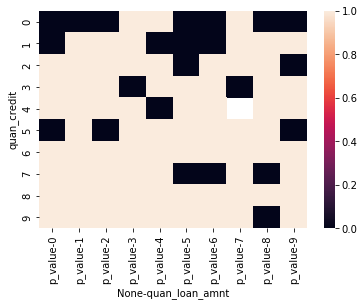

In [225]:
sns.heatmap(boolean_vals.unstack());

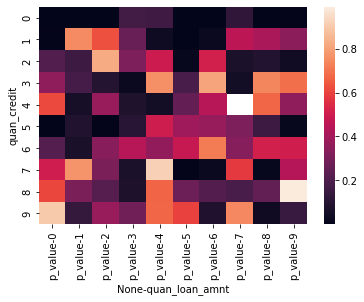

In [226]:
sns.heatmap(p_vals_table.unstack());

What is the probability of falsely rejecting the null hypothesis in each cell? What is the probability of falsely rejecting the null hypothesis in at least one of the cells (i.e. what is the **family wise error rate**)?

In other words, given that we made $m$ experiments, with confidence level $\alpha$, what is the probabilty $\mathbb{P}\left(\bigcup_i X_i \le q_{\alpha}\right)$? 

_Note_: you may assume that sampling from different bins are independent.

#### The probability to wrongfully declaring the program successful for at least one of these subsets is alpha=0.05
#### The probability of wrongfully rejecting the null for the entire population is
#### $1-(1-a)^(100) = 0.994$

## Bonferroni correction 

One way of assuring that your FWER remains below $\alpha=0.05$ is to apply a <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">**Bonferroni correction**</a>. This means that we set the signficance level of each individual test to $\alpha/m$, where $m=100$ is the number of tests (see, e.g., Wikipedia for an explanation). 

Use a Bonferroni correction on your segmented a/b test and output a $10\times10$ table of boolean values, indicating which test gave a significant result under this correction.

In [227]:
boolean_vals_bon = p_vals_table.copy()
boolean_vals_bon[boolean_vals_bon < 0.05/100] = 0
boolean_vals_bon[boolean_vals_bon >= 0.05/100] = 1
boolean_vals_bon

p_value
quan_credit quan_loan_amnt         
0           0                   0.0
            1                   1.0
            2                   1.0
            3                   1.0
            4                   1.0
...                             ...
9           5                   1.0
            6                   1.0
            7                   1.0
            8                   1.0
            9                   1.0

[100 rows x 1 columns]

How many of your tests came out significant under this correction?

In [228]:
int(100-boolean_vals_bon.sum().values[0])

5

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

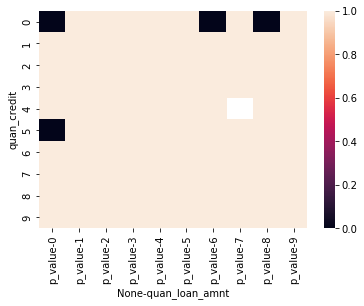

In [229]:
sns.heatmap(boolean_vals_bon.unstack());

## BH correction 

The Bonferroni correction is often criticized for being too restrictive, as you probably noticed in the last subsection. A more commonly used method for correcting $\alpha$ values is the Benjamini-Hochberg method. You can <a href="https://www.youtube.com/watch?v=K8LQSvtjcEo">check out the quest</a> for a nice explanation about it.

Start by arranging the $p$-values of your original test as a series and listing them in ascending order. You can use the `pd.DataFrame.stack` and `pd.Series.sort_values` methods.

In [230]:
sorted_pvals = p_vals_table.sort_values(by='p_value', ascending=True)
sorted_pvals

p_value
quan_credit quan_loan_amnt          
0           8               0.000012
            6               0.000135
            0               0.000322
5           0               0.000445
0           5               0.001352
...                              ...
2           2               0.828162
9           0               0.905424
7           4               0.917858
8           9               0.990708
4           7                    NaN

[100 rows x 1 columns]

Plot your sorted $p$-values

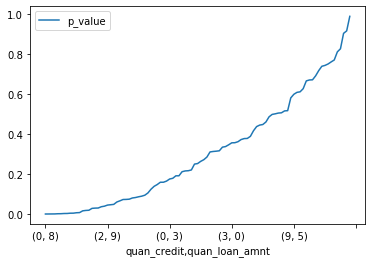

In [231]:
sorted_pvals.index = sorted_pvals.index#.to_flat_index()
sorted_pvals.plot();
#pd.Series(sorted_pvals.values).plot()

In [232]:
sorted_pvals.reset_index(inplace=True)

In [233]:
sorted_pvals

,quan_credit,quan_loan_amnt,p_value
0,0,8,0.000012
1,0,6,0.000135
2,0,0,0.000322
3,5,0,0.000445
4,0,5,0.001352
...,...,...,...
95,2,2,0.828162
96,9,0,0.905424
97,7,4,0.917858
98,8,9,0.990708


For each entry of the new series, compute the value compute the value $\frac{i}{m}\cdot\alpha$, where $i$ is the ordinal place of the entry (i.e. 1,2,...len(series)), $m=100$ and $\alpha=0.05$ as above. Add a plot of these values to your $p$-values plot.

In [234]:
new_vals = (np.arange(len(sorted_pvals))+1)*0.05/100
new_vals = pd.Series(new_vals)

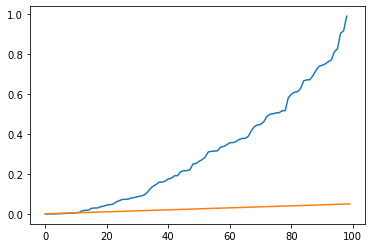

In [235]:
pd.Series(sorted_pvals['p_value'].plot())
pd.Series(new_vals).plot();

Find the largest index $i$ for which the $p$-value in the $i$-th place in the series is smaller than $\frac{i}{m}\cdot\alpha$. That is- the last index in the plot you just created where the $p$-values line lies below the _adjusted_-$\alpha$ line.

In [270]:
sorted_pvals['bool_smaller'] = sorted_pvals['p_value'] < new_vals
sorted_pvals['bool_smaller'].sum()

10

Reject the null hypothesis for all test before and including this index, and accept it for all others. Reformat your table into a $10\times 10$ dataframe; for which bins did we get a significant result in the corrected test?

In [239]:
sorted_pvals

,quan_credit,quan_loan_amnt,p_value,bool_smaller
0,0,8,0.000012,True
1,0,6,0.000135,True
2,0,0,0.000322,True
3,5,0,0.000445,True
4,0,5,0.001352,True
...,...,...,...,...
95,2,2,0.828162,False
96,9,0,0.905424,False
97,7,4,0.917858,False
98,8,9,0.990708,False


In [276]:
bool_smaller = sorted_pvals.pivot_table(index=['quan_credit', 'quan_loan_amnt'], values='bool_smaller').unstack()
bool_smaller = 1 - bool_smaller

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

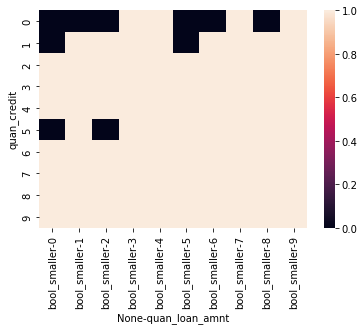

In [277]:
sns.heatmap(bool_smaller);

### Validating your results

You can validate your results (for both corrections) using the <a href= "https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html">`statsmodels.stats.multitest.multipletests`</a> package.

In [242]:
from statsmodels.stats.multitest import multipletests

In [243]:
p_vals_table['p_value'].values

array([3.21855828e-04, 1.58101405e-03, 2.73016445e-03, 1.75489715e-01,
       1.65022071e-01, 1.35193554e-03, 1.34648972e-04, 1.24310847e-01,
       1.23781831e-05, 7.10407871e-03, 4.05691976e-03, 7.51837388e-01,
       6.28241008e-01, 2.63883688e-01, 3.65331190e-02, 2.52862965e-03,
       3.00411025e-02, 4.61219364e-01, 4.17351694e-01, 3.46891744e-01,
       2.11963569e-01, 1.59184605e-01, 8.28161641e-01, 3.16909743e-01,
       4.99173094e-01, 1.58750724e-02, 5.16752392e-01, 7.27001087e-02,
       8.93729099e-02, 4.48061704e-02, 3.56773776e-01, 1.78971455e-01,
       9.42214396e-02, 2.82789841e-02, 7.62259200e-01, 1.91394734e-01,
       8.12668004e-01, 4.82498071e-02, 7.40370275e-01, 6.92417465e-01,
       6.12373469e-01, 6.01717296e-02, 3.78084417e-01, 8.03454698e-02,
       4.64645986e-02, 2.52880989e-01, 4.45737865e-01,            nan,
       6.71785823e-01, 3.57352937e-01, 4.44861338e-04, 8.63516431e-02,
       4.27846435e-03, 1.05480326e-01, 5.02145803e-01, 3.89288039e-01,
      

In [269]:
multipletests(p_vals_table['p_value'].values, alpha=0.05, method='bonferroni', returnsorted=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/multitest.py:150: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/multitest.py:257: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


(array([ True, False, False, False, False, False,  True, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([0.03218558, 0.15810141, 0.27301644, 1.        , 1.        ,
        0.13519355, 0.0134649 , 1.        , 0.00123782, 0.71040787,
        0.40569198, 1.        , 1.        , 1.        , 1.        

In [278]:
multipletests(p_vals_table['p_value'].values, alpha=0.05, method='fdr_bh', returnsorted=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/multitest.py:339: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


(array([ True,  True,  True, False, False,  True,  True, False,  True,
        False,  True, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan